# The workbook
creating a workbook because then you could see what steps that i took to make my conclusions

In [2]:
#installing required libraries 
%pip install pandas seaborn matplotlib numpy
#importing the packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 88.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 78.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 111.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 119.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing the data 
df = pd.read_csv("./medical_examination.csv")
#checking
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data cleaning

In [7]:
#Creating overweight column in the df variable based on BMI
df["overweight"]= (df['weight'] / ((df['height'] / 100) ** 2)) > 25
# Convert overweight boolean to 0 or 1
df['overweight'] = df['overweight'].astype(int)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [5]:
df["cholesterol"] = df["cholesterol"].apply(lambda x:0 if x ==1 else 1)
df["gluc"] = df["gluc"].apply(lambda x:0 if x==1 else 1)
#checking for the changes

print(df["cholesterol"].value_counts(),
df["gluc"].value_counts())

cholesterol
0    52385
1    17615
Name: count, dtype: int64 gluc
0    59479
1    10521
Name: count, dtype: int64


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by Cardio so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

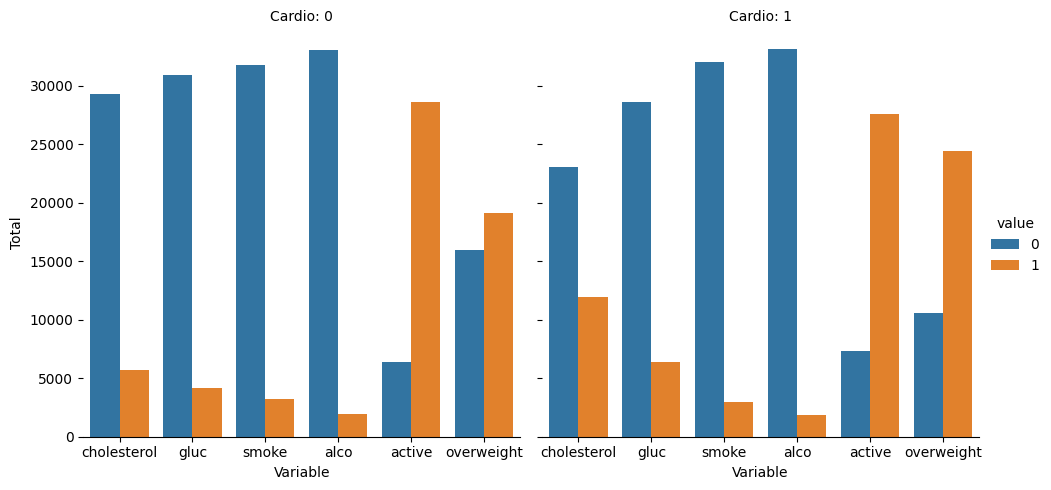

In [11]:
#converting to long format 
df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol","gluc","smoke","alco","active","overweight"]
)
def draw_cat_plot():
    plot = sns.catplot(
        x='variable',
        hue='value',
        col='cardio',
        data=df_cat,
        kind='count',
        height=5,
        aspect=1
    )
    
    plot.set_axis_labels('Variable', 'Total')
    plot.set_titles('Cardio: {col_name}')
    plot.despine(left=True)

    
    plt.show()
draw_cat_plot()